# 2. Mutual information (Identify the most important features)

First encountering a new dataset can sometimes feel overwhelming. You might be presented with hundreds or thousands of features without even a description to go by. Where do you even begin?

A great first step is to construct a ranking with a feature utility metric, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.

The metric we'll use is called **"mutual information"**. Mutual information is a lot like correlation in that it measures a relationship between two quantities. **The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships**.

**Mutual information is a great general-purpose metric and especially useful at the start of feature development when you might not know what model you'd like to use yet.** It is:
- easy to use and interpret,
- computationally efficient,
- theoretically well-founded,
- resistant to overfitting, and,
- able to detect any kind of relationship

## 2.1 Mutual Information and What it Measures

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

Here's an example from the Ames Housing data. The figure shows the relationship between the exterior quality of a house and the price it sold for. Each point represents a house.

![02.MI_house_price.png](../img/02.MI_house_price.png)

(Knowing the exterior quality of a house reduces uncertainty about its sale price.)

From the figure, we can see that knowing the value of `ExterQual` should make you more certain about the corresponding SalePrice
-- each category of ExterQual tends to concentrate SalePrice to within a certain range. The mutual information that ExterQual has with SalePrice is the average reduction of uncertainty in SalePrice taken over the four values of ExterQual. Since Fair occurs less often than Typical, for instance, Fair gets less weight in the MI score.

(Technical note: What we're calling uncertainty is measured using a quantity from information theory known as "entropy". The entropy of a variable means roughly: "how many yes-or-no questions you would need to describe an occurrence of that variable, on average." The more questions you have to ask, the more uncertain you must be about the variable. Mutual information is how many questions you expect the feature to answer about the target.)




## 2.2 Interpreting Mutual Information Scores

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

The next figure will give you an idea of how MI values correspond to the kind and degree of association a feature has with the target.

![02.MI_Interpretation.png](../img/02.MI_Interpretation.png)

Left: Mutual information increases as the dependence between feature and target becomes tighter. Right: Mutual information can capture any kind of association (not just linear, like correlation.)

Here are some things to remember when applying mutual information:

- MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.
- It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. **MI can't detect interactions between features. It is a univariate metric**.
- The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.

## 2.3 A concret example (Automobiles of year 1985)

The Automobile dataset consists of 193 cars from the 1985 model year. The goal for this dataset is to predict a car's price (the target) from 23 of the car's features, such as make, body_style, and horsepower. In this example, we'll rank the features with mutual information and investigate the results by data visualization.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
plt.style.use("seaborn-whitegrid")

In [7]:
data_path="../data/autos.csv"
label_column="price"

In [6]:
df=pd.read_csv(data_path)
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that must have a float dtype is not discrete. Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding. (You can review label encodings in our Categorical Variables lesson.)

In [9]:
# prepare feature and label
X = df.copy()
y= X.pop(label_column)

X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,4,130,mpfi,3.47,2.68,9,111,5000,21,27
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,4,130,mpfi,3.47,2.68,9,111,5000,21,27
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,6,152,mpfi,2.68,3.47,9,154,5000,19,26
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,4,109,mpfi,3.19,3.40,10,102,5500,24,30
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,5,136,mpfi,3.19,3.40,8,115,5500,18,22


In [10]:
# Label encoding for categorical columns
for col_name in X.select_dtypes("object"):
    X[col_name], _ = X[col_name].factorize()

In [11]:
# You can notice now all categorical columns are converted to int (e.g. body_style)
X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22


In [12]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [14]:
print(type(discrete_features))
print(discrete_features)

<class 'pandas.core.series.Series'>
symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool


Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif). Our target, price, is real-valued. The next cell computes the MI scores for our features and wraps them up in a nice dataframe.

In [15]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [18]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.615531
highway_mpg          0.958385
length               0.611800
bore                 0.492894
stroke               0.388893
num_of_cylinders     0.330589
compression_ratio    0.133264
fuel_type            0.047298
Name: MI Scores, dtype: float64

In [19]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

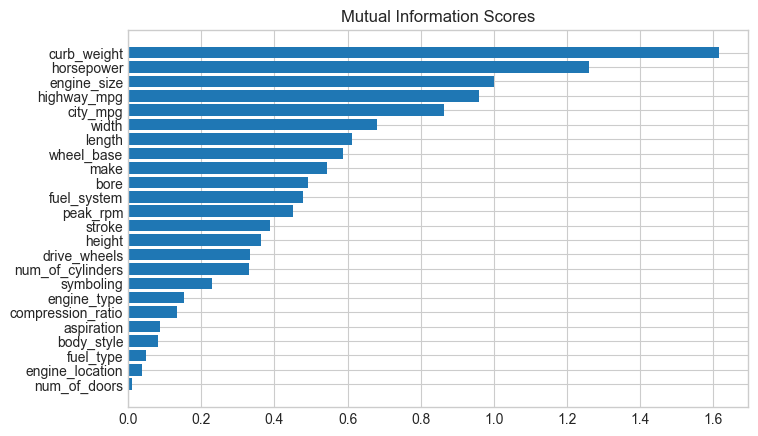

In [20]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Data visualization is a great follow-up to a utility ranking. Let's take a closer look at a couple of these.

As we might expect, the high-scoring curb_weight feature exhibits a strong relationship with price, the target.

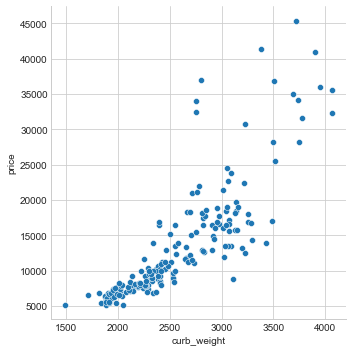

In [21]:
sns.relplot(x="curb_weight", y="price", data=df);

The fuel_type feature has a fairly low MI score, but as we can see from the figure, it clearly separates two price populations with different trends within the horsepower feature. This indicates that fuel_type contributes an interaction effect and might not be unimportant after all. Before deciding a feature is unimportant from its MI score, it's good to investigate any possible interaction effects -- domain knowledge can offer a lot of guidance here.

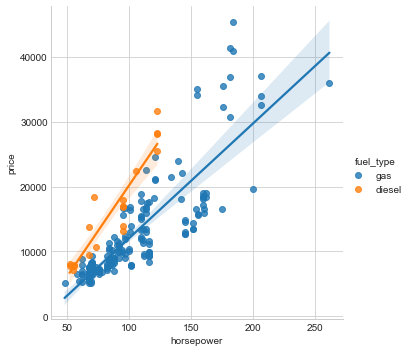

In [22]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);

Data visualization is a great addition to your feature-engineering toolbox. Along with utility metrics like mutual information, visualizations like these can help you discover important relationships in your data.